# 1. K-nearest Neighbors (KNN)
`K-nearest Neighbors (KNN)` is a simple, easy-to-implement supervised machine learning algorithm that can be used for both `classification` and `regression` tasks. The core idea behind KNN is to predict the label of a data point based on the labels of its 'K' nearest neighbors in the feature space.

It is a `non-parametric`, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. `Lazy learning` means that it does not require any training data points for model generation. Instead, it stores the training data points and performs computations only when a prediction is required. KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

#### 1.1. **How KNN Works**
1. Choose the number of neighbors 'K'.
2. For a new data point, calculate the distance between this point and all other points in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.
3. Select the 'K' nearest neighbors based on the calculated distances.
4. Assign a label to the new data point based on the majority vote of the labels of the 'K' nearest neighbors.



In [228]:
# Example of KNN classifier on IRIS data using SNS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
df = sns.load_dataset('iris')       #iris is a built-in dataset in sns library 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [229]:
df.shape

(150, 5)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [231]:
# NOW split the data into features and target
X = df.drop('species', axis=1)             # axis=1 means that this is a column. for row axis=0 
y = df['species']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# NOW we will create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [233]:
# NOW we will make predictions
y_pred = knn.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [234]:
# NOW we will evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


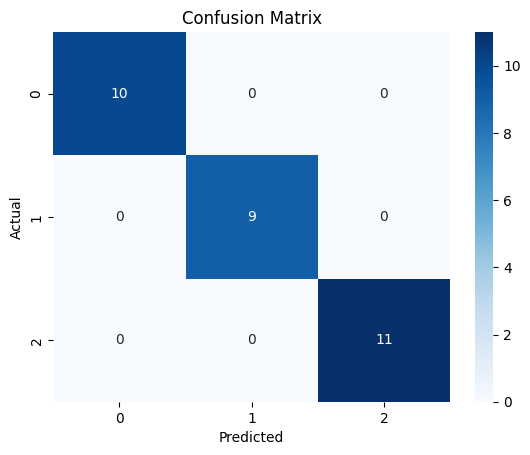

In [235]:
# PLOT the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Regression with KNN

In [236]:
# We will use the Regression problem on tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [237]:
# split the data
X = tips.drop('tip', axis=1)
y = tips['tip']

In [238]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [239]:
# ENCODE the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# X_train['sex'] = le.fit_transform(X_train['sex'])
# X_train['smoker'] = le.fit_transform(X_train['smoker'])
# X_train['day'] = le.fit_transform(X_train['day'])
# X_train['time'] = le.fit_transform(X_train['time'])

# X_test['sex'] = le.fit_transform(X_test['sex'])
# X_test['smoker'] = le.fit_transform(X_test['smoker'])
# X_test['day'] = le.fit_transform(X_test['day'])
# X_test['time'] = le.fit_transform(X_test['time'])


# or we do the same above stuff using for-loop
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [243]:
# train test split the data and run the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [247]:

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
# metric = 'minkowski' or 'euclidean'
# p = 1 or 2 for manhattan or euclidean


# fit the model on the training data
model.fit(X_train, y_train)

# predict the species for the test data
y_pred = model.predict(X_test)

In [245]:


# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [246]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [242]:
# predict a specific value
model.predict([[45, 1, 0, 1, 1, 3]])

/opt/anaconda3/envs/python_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([4.946])